## Facial Filters

Using your trained facial keypoint detector, you can now do things like add filters to a person's face, automatically.

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

Image shape:  (1123, 3064, 4)


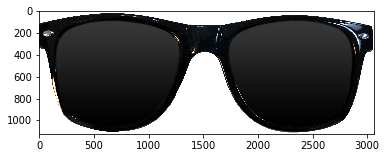

In [11]:
sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)

plt.imshow(sunglasses)

print('Image shape: ', sunglasses.shape)
# The fourth channel is the alpha channel, representing transparency

The alpha channel looks like this (black pixels = transparent): 


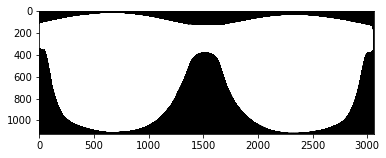

In [12]:
# print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('The alpha channel looks like this (black pixels = transparent): ')
plt.imshow(alpha_channel, cmap='gray')

In [13]:
# just to double check that there are indeed non-zero values
values = np.where(alpha_channel != 0)
print ('The non-zero values of the alpha channel are: ')
print (values)

The non-zero values of the alpha channel are: 
(array([  17,   17,   17, ..., 1109, 1109, 1109]), array([ 687,  688,  689, ..., 2376, 2377, 2378]))


#### Keypoint locations

In doing this, it's helpful to understand which keypoint belongs to the eyes, mouth, etc., so in the image below we also print the index of each facial keypoint directly on the image so you can tell which keypoints are for the eyes, eyebrows, etc.

<img src="images/landmarks_numbered.jpg" width=50% height=50%/>


In [14]:
# load in training data
key_pts_frame = pd.read_csv('data/training_frames_keypoints.csv')
print('Number of images: ', key_pts_frame.shape[0])

Number of images:  3462


In [15]:
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image)
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')

Image name:  Christopher_Walken_01.jpg


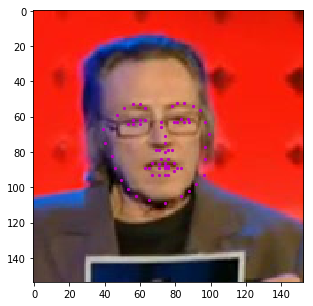

In [16]:
n = 120
image_name = key_pts_frame.iloc[n, 0]
image = mpimg.imread(os.path.join('data/training/', image_name))
key_pts = key_pts_frame.iloc[n, 1:].as_matrix()
key_pts = key_pts.astype('float').reshape(-1, 2)

print('Image name: ', image_name)

plt.figure(figsize=(5, 5))
show_keypoints(image, key_pts)
plt.show()

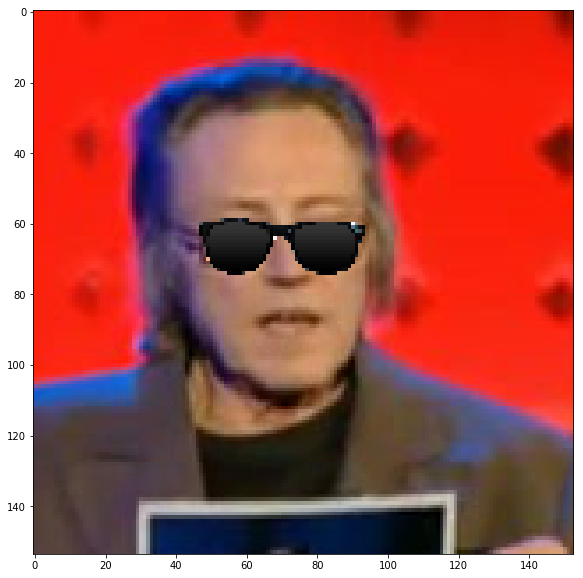

In [18]:
image_copy = np.copy(image)

x = int(key_pts[17, 0])
y = int(key_pts[17, 1])

h = int(abs(key_pts[27,1] - key_pts[34,1]))
# w = left to right eyebrow edges
w = int(abs(key_pts[17,0] - key_pts[26,0]))

sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)
# resize sunglasses
new_sunglasses =  cv2.resize(sunglasses, (w, h), interpolation = cv2.INTER_CUBIC)

# get region of interest on the face to change
roi_color = image_copy[y:y+h,x:x+w]

# find all non-transparent pts
ind = np.argwhere(new_sunglasses[:,:,3] > 0)

# for each non-transparent point, replace the original image pixel with that of the new_sunglasses
for i in range(3):
    roi_color[ind[:,0],ind[:,1],i] = new_sunglasses[ind[:,0],ind[:,1],i]    
# set the area of the image to the changed region with sunglasses
image_copy[y:y+h,x:x+w] = roi_color

plt.figure(figsize=(10,10))
plt.imshow(image_copy)